In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv

In [36]:
## Subset both the taxonomy dataframes.
nodeTax = pd.read_csv('../data/notebooks_out/viral_df_taxonomy.csv',index_col=0)

# A few rules for subsetting.

# Has to have family assigned at least
nodeTax = nodeTax[nodeTax['family'] != 'Unclassified']
# Has to fall in an 'enviromental/plant infecting family.'
plantVirFam = ['Partitiviridae','Totiviridae','Chrysoviridae','Virgaviridae','Comoviridae','Phycodnaviridae',
              'Endornaviridae', 'Solemoviridae', 'Deltaflexiviridae','Bromoviridae']

nodeTax = nodeTax[nodeTax['family'].isin(plantVirFam)]

sraTax = pd.read_csv('../data/notebooks_out/viral_df_taxonomy_SRA.csv',index_col=0)
sraTax = sraTax[sraTax['family'] != 'Unclassified']
sraTax = sraTax[sraTax['family'].isin(plantVirFam)]

In [37]:
#Read in coverage matrix.
covmatsra = pd.read_csv("../data/Pcoa/SRA_df_coverage_lengthnorm.tsv", sep=',', index_col=0)
covmatbe = pd.read_csv("../data/Pcoa/flembee_df_coverage_lengthnorm.tsv", sep=",", index_col=0)
covmatbe = covmatbe.T
covmat = pd.concat([covmatsra, covmatbe], axis=0, join='outer')
covmat = covmat[covmat.columns.intersection(list(sraTax.index) + list(nodeTax.index))]

In [38]:
#Now we need information on the eukaryotic family of the host to begin with. For now we keep the flemish bee samples as seperate from apidae.
metadatdf = pd.read_csv("../data/Metadata_location_year_study_kind.csv", sep=";")
list(metadatdf[metadatdf['Tax_family'] == 'Formicidae']['Run'])

#We will only seperate families where we have more than 10 samples each, the others will be collapsed in an 'other'group.
#To start we just take the contig representatives.
Belgium_runs = list(covmatbe.index)
Formicidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Formicidae']['Run'])
Apidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Apidae']['Run'])
Vespidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Vespidae']['Run'])
Halictidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Halictidae']['Run'])
Braconidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Braconidae']['Run'])
Megachilidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Megachilidae']['Run'])
Pteromalidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Pteromalidae']['Run'])
Cephidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Cephidae']['Run'])
Figitidae_runs = list(metadatdf[metadatdf['Tax_family'] == 'Figitidae']['Run'])
Gathered = Belgium_runs + Formicidae_runs + Apidae_runs + Vespidae_runs + Halictidae_runs + Braconidae_runs + Megachilidae_runs + Pteromalidae_runs + Cephidae_runs + Figitidae_runs
Others_runs = []
for i in list(metadatdf['Run']):
    if i not in Gathered:
        Others_runs.append(i)

In [39]:
#Sanity test to see if we didn't miss anything:
len(covmat) == len(Belgium_runs) + len(Formicidae_runs) + len(Apidae_runs) + len(Vespidae_runs) + len(Halictidae_runs) + len(Braconidae_runs) + len(Megachilidae_runs) + len(Pteromalidae_runs) + len(Cephidae_runs) + len(Figitidae_runs) + len(Others_runs)

True

In [40]:
#Now subset the coverage matrix, so we have 1 matrix / eukaryotic family.
Belgium_cov = covmat[covmat.index.isin(Belgium_runs)]
Formicidae_cov = covmat[covmat.index.isin(Formicidae_runs)]
Apidae_cov = covmat[covmat.index.isin(Apidae_runs)]
Vespidae_cov = covmat[covmat.index.isin(Vespidae_runs)]
Halictidae_cov = covmat[covmat.index.isin(Halictidae_runs)]
Braconidae_cov = covmat[covmat.index.isin(Braconidae_runs)]
Megachilidae_cov = covmat[covmat.index.isin(Megachilidae_runs)]
Pteromalidae_cov = covmat[covmat.index.isin(Pteromalidae_runs)]
Cephidae_cov = covmat[covmat.index.isin(Cephidae_runs)]
Figitidae_cov = covmat[covmat.index.isin(Figitidae_runs)]
Others_cov = covmat[covmat.index.isin(Others_runs)]

<AxesSubplot:>

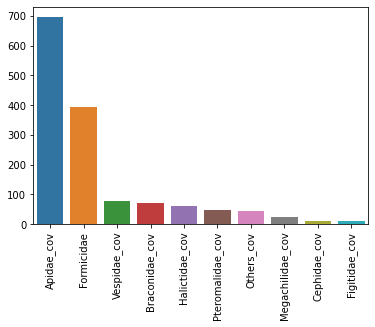

In [41]:
#Just get some barplots on the samples per eukaryotic family. This is quite skewed, but we assume that they are sampled completely. (This is a big flaw, but can't do anything about it).
famlen = [len(Apidae_cov) + len(Belgium_cov), len(Formicidae_cov),len(Vespidae_cov),len(Braconidae_cov),len(Halictidae_cov),len(Pteromalidae_cov),len(Others_cov),len(Megachilidae_cov),len(Cephidae_cov),len(Figitidae_cov)]
g = sns.barplot(x = ['Apidae_cov','Formicidae','Vespidae_cov','Braconidae_cov','Halictidae_cov','Pteromalidae_cov','Others_cov','Megachilidae_cov','Cephidae_cov','Figitidae_cov'], y=famlen)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

In [42]:
#Now get lists of the representative contigs in each of the families.
Belgium_contigs = []
for i in list(covmat.columns):
    if 'BP' in i or 'BeeP' in i:
        Belgium_contigs.append(i)
Formicidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Formicidae_runs:
        Formicidae_contigs.append(i)
Apidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Apidae_runs:
        Apidae_contigs.append(i)
Vespidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Vespidae_runs:
        Vespidae_contigs.append(i)
Halictidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Halictidae_runs:
        Halictidae_contigs.append(i)
Braconidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Braconidae_runs:
        Braconidae_contigs.append(i)
Megachilidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Megachilidae_runs:
        Megachilidae_contigs.append(i)
Pteromalidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Pteromalidae_runs:
        Pteromalidae_contigs.append(i)
Cephidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Cephidae_runs:
        Cephidae_contigs.append(i)
Figitidae_contigs  = []
for i in list(covmat.columns):
    if i.split('.')[0] in Figitidae_runs:
        Figitidae_contigs.append(i)
Others_contigs = []
for i in list(covmat.columns):
    if i.split('.')[0] in Others_runs:
        Others_contigs.append(i)

[800, 23, 6, 42, 5, 16, 0, 15, 8, 0]
915


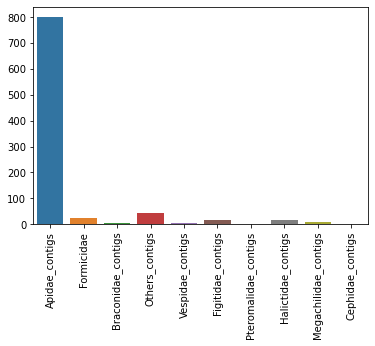

In [43]:
famlen = [len(Apidae_contigs) + len(Belgium_contigs), len(Formicidae_contigs),len(Braconidae_contigs),len(Others_contigs), len(Vespidae_contigs),len(Figitidae_contigs),len(Pteromalidae_contigs),len(Halictidae_contigs),len(Megachilidae_contigs),len(Cephidae_contigs)]
print(famlen)
g = sns.barplot(x = ['Apidae_contigs','Formicidae','Braconidae_contigs','Others_contigs','Vespidae_contigs','Figitidae_contigs','Pteromalidae_contigs','Halictidae_contigs','Megachilidae_contigs','Cephidae_contigs'], y=famlen)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g
print(sum(famlen))

In [44]:
#Sanity test to see if we have all contigs.
sum(famlen) == len(covmat.columns)

True

In [45]:
#now evaluate presence (defined as a relative count > 0.1 (assuming average of 100bp reads, this would be 10x covered, and the average is actually ~189))
#This treshold needs to be true for 10% of the samples of a particular family, and then it's appended.
#Create an edge list
#We have kept Belgium and Apidae in seperate lists / dfs, but we want to combine them here.
Apidae2_cov = pd.concat([Apidae_cov, Belgium_cov])
Apidae2_contigs = Apidae_contigs + Belgium_contigs


virus_sharing = []
#Apidae vs the rest.
Api_Formi= Formicidae_cov[Apidae2_contigs][Formicidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Formicidae',len(Api_Formi[Api_Formi > len(Formicidae_cov)*0.1])])
Api_Vespi= Vespidae_cov[Apidae2_contigs][Vespidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Vespidae',len(Api_Vespi[Api_Vespi > len(Vespidae_cov)*0.1])])
Api_Halict= Halictidae_cov[Apidae2_contigs][Halictidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Halictidae',len(Api_Halict[Api_Halict > len(Halictidae_cov)*0.1])])
Api_Braco= Braconidae_cov[Apidae2_contigs][Braconidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Braconidae',len(Api_Braco[Api_Braco > len(Braconidae_cov)*0.1])])
Api_Mega= Megachilidae_cov[Apidae2_contigs][Megachilidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Megachilidae',len(Api_Mega[Api_Mega > len(Megachilidae_cov)*0.1])])
Api_Ptero= Pteromalidae_cov[Apidae2_contigs][Pteromalidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Pteromalidae',len(Api_Ptero[Api_Ptero > len(Pteromalidae_cov)*0.1])])
Api_Cephi= Cephidae_cov[Apidae2_contigs][Cephidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Cephidae',len(Api_Cephi[Api_Cephi > len(Cephidae_cov)*0.1])])
Api_Figi= Figitidae_cov[Apidae2_contigs][Figitidae_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Figitidae',len(Api_Figi[Api_Figi > len(Figitidae_cov)*0.1])])
Api_Others= Others_cov[Apidae2_contigs][Others_cov[Apidae2_contigs] > 0.1].count()
virus_sharing.append(['Apidae','Others',len(Api_Others[Api_Others > len(Others_cov)*0.1])])

## Formicidae vs the rest.
Formi_Api= Apidae2_cov[Formicidae_contigs][Apidae2_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Apidae',len(Formi_Api[Formi_Api > len(Apidae2_cov)*0.1])])
Formi_Vespi= Vespidae_cov[Formicidae_contigs][Vespidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Vespidae',len(Formi_Vespi[Formi_Vespi > len(Vespidae_cov)*0.1])])
Formi_Halict= Halictidae_cov[Formicidae_contigs][Halictidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Halictidae',len(Formi_Halict[Formi_Halict > len(Halictidae_cov)*0.1])])
Formi_Braco= Braconidae_cov[Formicidae_contigs][Braconidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Braconidae',len(Formi_Braco[Formi_Braco > len(Braconidae_cov)*0.1])])
Formi_Mega= Megachilidae_cov[Formicidae_contigs][Megachilidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Megachilidae',len(Formi_Mega[Formi_Mega > len(Megachilidae_cov)*0.1])])
Formi_Ptero= Pteromalidae_cov[Formicidae_contigs][Pteromalidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Pteromalidae',len(Formi_Ptero[Formi_Ptero > len(Pteromalidae_cov)*0.1])])
Formi_Cephi= Cephidae_cov[Formicidae_contigs][Cephidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Cephidae',len(Formi_Cephi[Formi_Cephi > len(Cephidae_cov)*0.1])])
Formi_Figi= Figitidae_cov[Formicidae_contigs][Figitidae_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Figitidae',len(Formi_Figi[Formi_Figi > len(Figitidae_cov)*0.1])])
Formi_Others= Others_cov[Formicidae_contigs][Others_cov[Formicidae_contigs] > 0.1].count()
virus_sharing.append(['Formicidae','Others',len(Formi_Others[Formi_Others > len(Others_cov)*0.1])])

#Vespidae vs the rest.
Vespi_Formi= Formicidae_cov[Vespidae_contigs][Formicidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Formicidae',len(Vespi_Formi[Vespi_Formi > len(Formicidae_cov)*0.1])])
Vespi_Api= Apidae2_cov[Vespidae_contigs][Apidae2_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Apidae',len(Vespi_Api[Vespi_Api > len(Apidae2_cov)*0.1])])
Vespi_Halict= Halictidae_cov[Vespidae_contigs][Halictidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Halictidae',len(Vespi_Halict[Vespi_Halict > len(Halictidae_cov)*0.1])])
Vespi_Braco= Braconidae_cov[Vespidae_contigs][Braconidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Braconidae',len(Vespi_Braco[Vespi_Braco > len(Braconidae_cov)*0.1])])
Vespi_Mega= Megachilidae_cov[Vespidae_contigs][Megachilidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Megachilidae',len(Vespi_Mega[Vespi_Mega > len(Megachilidae_cov)*0.1])])
Vespi_Ptero= Pteromalidae_cov[Vespidae_contigs][Pteromalidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Pteromalidae',len(Vespi_Ptero[Vespi_Ptero > len(Pteromalidae_cov)*0.1])])
Vespi_Cephi= Cephidae_cov[Vespidae_contigs][Cephidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Cephidae',len(Vespi_Cephi[Vespi_Cephi > len(Cephidae_cov)*0.1])])
Vespi_Figi= Figitidae_cov[Vespidae_contigs][Figitidae_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Figitidae',len(Vespi_Figi[Vespi_Figi > len(Figitidae_cov)*0.1])])
Vespi_Others= Others_cov[Vespidae_contigs][Others_cov[Vespidae_contigs] > 0.1].count()
virus_sharing.append(['Vespidae','Others',len(Vespi_Others[Vespi_Others > len(Others_cov)*0.1])])

##Halictidae vs the rest.
Halict_Formi= Formicidae_cov[Halictidae_contigs][Formicidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Formicidae',len(Halict_Formi[Halict_Formi > len(Formicidae_cov)*0.1])])
Halict_Api= Apidae2_cov[Halictidae_contigs][Apidae2_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Apidae',len(Halict_Api[Halict_Api > len(Apidae2_cov)*0.1])])
Halict_Vespi= Vespidae_cov[Halictidae_contigs][Vespidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Vespidae',len(Halict_Vespi[Halict_Vespi > len(Vespidae_cov)*0.1])])
Halict_Braco= Braconidae_cov[Halictidae_contigs][Braconidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Braconidae',len(Halict_Braco[Halict_Braco > len(Braconidae_cov)*0.1])])
Halict_Mega= Megachilidae_cov[Halictidae_contigs][Megachilidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Megachilidae',len(Halict_Mega[Halict_Mega > len(Megachilidae_cov)*0.1])])
Halict_Ptero= Pteromalidae_cov[Halictidae_contigs][Pteromalidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Pteromalidae',len(Halict_Ptero[Halict_Ptero > len(Pteromalidae_cov)*0.1])])
Halict_Cephi= Cephidae_cov[Halictidae_contigs][Cephidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Cephidae',len(Halict_Cephi[Halict_Cephi > len(Cephidae_cov)*0.1])])
Halict_Figi= Figitidae_cov[Halictidae_contigs][Figitidae_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Figitidae',len(Halict_Figi[Halict_Figi > len(Figitidae_cov)*0.1])])
Halict_Others= Others_cov[Halictidae_contigs][Others_cov[Halictidae_contigs] > 0.1].count()
virus_sharing.append(['Halictidae','Others',len(Halict_Others[Halict_Others > len(Others_cov)*0.1])])

#Braconidae vs the rest
Braco_Formi= Formicidae_cov[Braconidae_contigs][Formicidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Formicidae',len(Braco_Formi[Braco_Formi > len(Formicidae_cov)*0.1])])
Braco_Api= Apidae2_cov[Braconidae_contigs][Apidae2_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Apidae',len(Braco_Api[Braco_Api > len(Apidae2_cov)*0.1])])
Braco_Vespi= Vespidae_cov[Braconidae_contigs][Vespidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Vespidae',len(Braco_Vespi[Braco_Vespi > len(Vespidae_cov)*0.1])])
Braco_Halict= Halictidae_cov[Braconidae_contigs][Halictidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Halictidae',len(Braco_Halict[Braco_Halict > len(Halictidae_cov)*0.1])])
Braco_Mega= Megachilidae_cov[Braconidae_contigs][Megachilidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Megachilidae',len(Braco_Mega[Braco_Mega > len(Megachilidae_cov)*0.1])])
Braco_Ptero= Pteromalidae_cov[Braconidae_contigs][Pteromalidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Pteromalidae',len(Braco_Ptero[Braco_Ptero > len(Pteromalidae_cov)*0.1])])
Braco_Cephi= Cephidae_cov[Braconidae_contigs][Cephidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Cephidae',len(Braco_Cephi[Braco_Cephi > len(Cephidae_cov)*0.1])])
Braco_Figi= Figitidae_cov[Braconidae_contigs][Figitidae_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Figitidae',len(Braco_Figi[Braco_Figi > len(Figitidae_cov)*0.1])])
Braco_Others= Others_cov[Braconidae_contigs][Others_cov[Braconidae_contigs] > 0.1].count()
virus_sharing.append(['Braconidae','Others',len(Braco_Others[Braco_Others > len(Others_cov)*0.1])])

#Megachilidae vs the rest.
Mega_Formi= Formicidae_cov[Megachilidae_contigs][Formicidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Formicidae',len(Mega_Formi[Mega_Formi > len(Formicidae_cov)*0.1])])
Mega_Api= Apidae2_cov[Megachilidae_contigs][Apidae2_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Apidae',len(Mega_Api[Mega_Api > len(Apidae2_cov)*0.1])])
Mega_Vespi= Vespidae_cov[Megachilidae_contigs][Vespidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Vespidae',len(Mega_Vespi[Mega_Vespi > len(Vespidae_cov)*0.1])])
Mega_Halict= Halictidae_cov[Megachilidae_contigs][Halictidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Halictidae',len(Mega_Halict[Mega_Halict > len(Halictidae_cov)*0.1])])
Mega_Braco= Braconidae_cov[Megachilidae_contigs][Braconidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Braconidae',len(Mega_Braco[Mega_Braco > len(Braconidae_cov)*0.1])])
Mega_Ptero= Pteromalidae_cov[Megachilidae_contigs][Pteromalidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Pteromalidae',len(Mega_Ptero[Mega_Ptero > len(Pteromalidae_cov)*0.1])])
Mega_Cephi= Cephidae_cov[Megachilidae_contigs][Cephidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Cephidae',len(Mega_Cephi[Mega_Cephi > len(Cephidae_cov)*0.1])])
Mega_Figi= Figitidae_cov[Megachilidae_contigs][Figitidae_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Figitidae',len(Mega_Figi[Mega_Figi > len(Figitidae_cov)*0.1])])
Mega_Others= Others_cov[Megachilidae_contigs][Others_cov[Megachilidae_contigs] > 0.1].count()
virus_sharing.append(['Megachilidae','Others',len(Mega_Others[Mega_Others > len(Others_cov)*0.1])])

#Pteromalidae vs the rest
Ptero_Formi= Formicidae_cov[Pteromalidae_contigs][Formicidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Formicidae',len(Ptero_Formi[Ptero_Formi > len(Formicidae_cov)*0.1])])
Ptero_Api= Apidae2_cov[Pteromalidae_contigs][Apidae2_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Apidae',len(Ptero_Api[Ptero_Api > len(Apidae2_cov)*0.1])])
Ptero_Vespi= Vespidae_cov[Pteromalidae_contigs][Vespidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Vespidae',len(Ptero_Vespi[Ptero_Vespi > len(Vespidae_cov)*0.1])])
Ptero_Halict= Halictidae_cov[Pteromalidae_contigs][Halictidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Halictidae',len(Ptero_Halict[Ptero_Halict > len(Halictidae_cov)*0.1])])
Ptero_Braco= Braconidae_cov[Pteromalidae_contigs][Braconidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Braconidae',len(Ptero_Braco[Ptero_Braco > len(Braconidae_cov)*0.1])])
Ptero_Mega= Megachilidae_cov[Pteromalidae_contigs][Megachilidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Megachilidae',len(Ptero_Mega[Ptero_Mega > len(Megachilidae_cov)*0.1])])
Ptero_Cephi= Cephidae_cov[Pteromalidae_contigs][Cephidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Cephidae',len(Ptero_Cephi[Ptero_Cephi > len(Cephidae_cov)*0.1])])
Ptero_Figi= Figitidae_cov[Pteromalidae_contigs][Figitidae_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Figitidae',len(Ptero_Figi[Ptero_Figi > len(Figitidae_cov)*0.1])])
Ptero_Others= Others_cov[Pteromalidae_contigs][Others_cov[Pteromalidae_contigs] > 0.1].count()
virus_sharing.append(['Pteromalidae','Others',len(Ptero_Others[Ptero_Others > len(Others_cov)*0.1])])

#Cephidae vs the rest
cephi_Formi= Formicidae_cov[Cephidae_contigs][Formicidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Formicidae',len(cephi_Formi[cephi_Formi > len(Formicidae_cov)*0.1])])
cephi_Api= Apidae2_cov[Cephidae_contigs][Apidae2_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Apidae',len(cephi_Api[cephi_Api > len(Apidae2_cov)*0.1])])
cephi_Vespi= Vespidae_cov[Cephidae_contigs][Vespidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Vespidae',len(cephi_Vespi[cephi_Vespi > len(Vespidae_cov)*0.1])])
cephi_Halict= Halictidae_cov[Cephidae_contigs][Halictidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Halictidae',len(cephi_Halict[cephi_Halict > len(Halictidae_cov)*0.1])])
cephi_Braco= Braconidae_cov[Cephidae_contigs][Braconidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Braconidae',len(cephi_Braco[cephi_Braco > len(Braconidae_cov)*0.1])])
cephi_Mega= Megachilidae_cov[Cephidae_contigs][Megachilidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Megachilidae',len(cephi_Mega[cephi_Mega > len(Megachilidae_cov)*0.1])])
cephi_Ptero= Pteromalidae_cov[Cephidae_contigs][Pteromalidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Pteromalidae',len(cephi_Ptero[cephi_Ptero > len(Pteromalidae_cov)*0.1])])
cephi_Figi= Figitidae_cov[Cephidae_contigs][Figitidae_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Figitidae',len(cephi_Figi[cephi_Figi > len(Figitidae_cov)*0.1])])
cephi_Others= Others_cov[Cephidae_contigs][Others_cov[Cephidae_contigs] > 0.1].count()
virus_sharing.append(['Cephidae','Others',len(cephi_Others[cephi_Others > len(Others_cov)*0.1])])

#Figitidae vs the rest.
Figi_Formi= Formicidae_cov[Figitidae_contigs][Formicidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Formicidae',len(Figi_Formi[Figi_Formi > len(Formicidae_cov)*0.1])])
Figi_Api= Apidae2_cov[Figitidae_contigs][Apidae2_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Apidae',len(Figi_Api[Figi_Api > len(Apidae2_cov)*0.1])])
Figi_Vespi= Vespidae_cov[Figitidae_contigs][Vespidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Vespidae',len(Figi_Vespi[Figi_Vespi > len(Vespidae_cov)*0.1])])
Figi_Halict= Halictidae_cov[Figitidae_contigs][Halictidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Halictidae',len(Figi_Halict[Figi_Halict > len(Halictidae_cov)*0.1])])
Figi_Braco= Braconidae_cov[Figitidae_contigs][Braconidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Braconidae',len(Figi_Braco[Figi_Braco > len(Braconidae_cov)*0.1])])
Figi_Mega= Megachilidae_cov[Figitidae_contigs][Megachilidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Megachilidae',len(Figi_Mega[Figi_Mega > len(Megachilidae_cov)*0.1])])
Figi_Ptero= Pteromalidae_cov[Figitidae_contigs][Pteromalidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Pteromalidae',len(Figi_Ptero[Figi_Ptero > len(Pteromalidae_cov)*0.1])])
Figi_Cephi= Cephidae_cov[Figitidae_contigs][Cephidae_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Cephidae',len(Figi_Cephi[Figi_Cephi > len(Cephidae_cov)*0.1])])
Figi_Others= Others_cov[Figitidae_contigs][Others_cov[Figitidae_contigs] > 0.1].count()
virus_sharing.append(['Figitidae','Others',len(Figi_Others[Figi_Others > len(Others_cov)*0.1])])

#Others vs the rest
Others_Formi= Formicidae_cov[Others_contigs][Formicidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Formicidae',len(Others_Formi[Others_Formi > len(Formicidae_cov)*0.1])])
Others_Api= Apidae2_cov[Others_contigs][Apidae2_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Apidae',len(Others_Api[Others_Api > len(Apidae2_cov)*0.1])])
Others_Vespi= Vespidae_cov[Others_contigs][Vespidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Vespidae',len(Others_Vespi[Others_Vespi > len(Vespidae_cov)*0.1])])
Others_Halict= Halictidae_cov[Others_contigs][Halictidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Halictidae',len(Others_Halict[Others_Halict > len(Halictidae_cov)*0.1])])
Others_Braco= Braconidae_cov[Others_contigs][Braconidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Braconidae',len(Others_Braco[Others_Braco > len(Braconidae_cov)*0.1])])
Others_Mega= Megachilidae_cov[Others_contigs][Megachilidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Megachilidae',len(Others_Mega[Others_Mega > len(Megachilidae_cov)*0.1])])
Others_Ptero= Pteromalidae_cov[Others_contigs][Pteromalidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Pteromalidae',len(Others_Ptero[Others_Ptero > len(Pteromalidae_cov)*0.1])])
Others_Cephi= Cephidae_cov[Others_contigs][Cephidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Cephidae',len(Others_Cephi[Others_Cephi > len(Cephidae_cov)*0.1])])
Others_Figi= Figitidae_cov[Others_contigs][Figitidae_cov[Others_contigs] > 0.1].count()
virus_sharing.append(['Others','Figitidae',len(Others_Figi[Others_Figi > len(Figitidae_cov)*0.1])])

In [46]:
#Remove the 0's.
virus_sharing2 = []
for i in virus_sharing:
    if i[2] > 0:
        tempLis = i
        tempLis[2] = i[2]/sum(famlen)
        virus_sharing2.append(i)

In [47]:
#Write to file, and process in cytoscape
with open('../networks/Virussharing_netw0.1_subset_plant.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(virus_sharing2)

In [48]:
#Now have a look at what viral families we are dealing with.
#First create a dic where we look at the contigs in general.
contigdic = {}
contigdic['Formi_Api'] = list(Formi_Api[Formi_Api > len(Apidae2_cov)*0.1].index)
contigdic['Formi_Vespi'] = list(Formi_Vespi[Formi_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Formi_Halict'] = list(Formi_Halict[Formi_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Formi_Braco'] = list(Formi_Braco[Formi_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Formi_Mega'] = list(Formi_Mega[Formi_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Formi_Ptero'] = list(Formi_Ptero[Formi_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Formi_Cephi'] = list(Formi_Cephi[Formi_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Formi_Figi'] = list(Formi_Figi[Formi_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Formi_Others'] = list(Formi_Others[Formi_Others > len(Others_cov)*0.1].index)
contigdic['Api_Formi'] = list(Api_Formi[Api_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Api_Vespi'] = list(Api_Vespi[Api_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Api_Halict'] = list(Api_Halict[Api_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Api_Braco'] = list(Api_Braco[Api_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Api_Mega'] = list(Api_Mega[Api_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Api_Ptero'] = list(Api_Ptero[Api_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Api_Cephi'] = list(Api_Cephi[Api_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Api_Figi'] = list(Api_Figi[Api_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Api_Others'] = list(Api_Others[Api_Others > len(Others_cov)*0.1].index)
contigdic['Vespi_Formi'] = list(Vespi_Formi[Vespi_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Vespi_Api'] = list(Vespi_Api[Vespi_Api > len(Apidae2_cov)*0.1].index)
contigdic['Vespi_Halict'] = list(Vespi_Halict[Vespi_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Vespi_Braco'] = list(Vespi_Braco[Vespi_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Vespi_Mega'] = list(Vespi_Mega[Vespi_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Vespi_Ptero'] = list(Vespi_Ptero[Vespi_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Vespi_Cephi'] = list(Vespi_Cephi[Vespi_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Vespi_Figi'] = list(Vespi_Figi[Vespi_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Vespi_Others'] = list(Vespi_Others[Vespi_Others > len(Others_cov)*0.1].index)
contigdic['Halict_Formi'] = list(Halict_Formi[Halict_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Halict_Api'] = list(Halict_Api[Halict_Api > len(Apidae2_cov)*0.1].index)
contigdic['Halict_Vespi'] = list(Halict_Vespi[Halict_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Halict_Braco'] = list(Halict_Braco[Halict_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Halict_Mega'] = list(Halict_Mega[Halict_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Halict_Ptero'] = list(Halict_Ptero[Halict_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Halict_Cephi'] = list(Halict_Cephi[Halict_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Halict_Figi'] = list(Halict_Figi[Halict_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Halict_Others'] = list(Halict_Others[Halict_Others > len(Others_cov)*0.1].index)
contigdic['Braco_Formi'] = list(Braco_Formi[Braco_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Braco_Api'] = list(Braco_Api[Braco_Api > len(Apidae2_cov)*0.1].index)
contigdic['Braco_Vespi'] = list(Braco_Vespi[Braco_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Braco_Halict'] = list(Braco_Halict[Braco_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Braco_Mega'] = list(Braco_Mega[Braco_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Braco_Ptero'] = list(Braco_Ptero[Braco_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Braco_Cephi'] = list(Braco_Cephi[Braco_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Braco_Figi'] = list(Braco_Figi[Braco_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Braco_Others'] = list(Braco_Others[Braco_Others > len(Others_cov)*0.1].index)
contigdic['Mega_Formi'] = list(Mega_Formi[Mega_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Mega_Api'] = list(Mega_Api[Mega_Api > len(Apidae2_cov)*0.1].index)
contigdic['Mega_Vespi'] = list(Mega_Vespi[Mega_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Mega_Halict'] = list(Mega_Halict[Mega_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Mega_Braco'] = list(Mega_Braco[Mega_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Mega_Ptero'] = list(Mega_Ptero[Mega_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Mega_Cephi'] = list(Mega_Cephi[Mega_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Mega_Figi'] = list(Mega_Figi[Mega_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Mega_Others'] = list(Mega_Others[Mega_Others > len(Others_cov)*0.1].index)
contigdic['Ptero_Formi'] = list(Ptero_Formi[Ptero_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Ptero_Api'] = list(Ptero_Api[Ptero_Api > len(Apidae2_cov)*0.1].index)
contigdic['Ptero_Vespi'] = list(Ptero_Vespi[Ptero_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Ptero_Halict'] = list(Ptero_Halict[Ptero_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Ptero_Braco'] = list(Ptero_Braco[Ptero_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Ptero_Mega'] = list(Ptero_Mega[Ptero_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Ptero_Cephi'] = list(Ptero_Cephi[Ptero_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Ptero_Figi'] = list(Ptero_Figi[Ptero_Figi > len(Figitidae_cov)*0.1].index)
contigdic['Ptero_Others'] = list(Ptero_Others[Ptero_Others > len(Others_cov)*0.1].index)
contigdic['cephi_Formi'] = list(cephi_Formi[cephi_Formi > len(Formicidae_cov)*0.1].index)
contigdic['cephi_Api'] = list(cephi_Api[cephi_Api > len(Apidae2_cov)*0.1].index)
contigdic['cephi_Vespi'] = list(cephi_Vespi[cephi_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['cephi_Halict'] = list(cephi_Halict[cephi_Halict > len(Halictidae_cov)*0.1].index)
contigdic['cephi_Braco'] = list(cephi_Braco[cephi_Braco > len(Braconidae_cov)*0.1].index)
contigdic['cephi_Mega'] = list(cephi_Mega[cephi_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['cephi_Ptero'] = list(cephi_Ptero[cephi_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['cephi_Figi'] = list(cephi_Figi[cephi_Figi > len(Figitidae_cov)*0.1].index)
contigdic['cephi_Others'] = list(cephi_Others[cephi_Others > len(Others_cov)*0.1].index)
contigdic['Figi_Formi'] = list(Figi_Formi[Figi_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Figi_Api'] = list(Figi_Api[Figi_Api > len(Apidae2_cov)*0.1].index)
contigdic['Figi_Vespi'] = list(Figi_Vespi[Figi_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Figi_Halict'] = list(Figi_Halict[Figi_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Figi_Braco'] = list(Figi_Braco[Figi_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Figi_Mega'] = list(Figi_Mega[Figi_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Figi_Ptero'] = list(Figi_Ptero[Figi_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Figi_Cephi'] = list(Figi_Cephi[Figi_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Figi_Others'] = list(Figi_Others[Figi_Others > len(Others_cov)*0.1].index)
contigdic['Others_Formi'] = list(Others_Formi[Others_Formi > len(Formicidae_cov)*0.1].index)
contigdic['Others_Api'] = list(Others_Api[Others_Api > len(Apidae2_cov)*0.1].index)
contigdic['Others_Vespi'] = list(Others_Vespi[Others_Vespi > len(Vespidae_cov)*0.1].index)
contigdic['Others_Halict'] = list(Others_Halict[Others_Halict > len(Halictidae_cov)*0.1].index)
contigdic['Others_Braco'] = list(Others_Braco[Others_Braco > len(Braconidae_cov)*0.1].index)
contigdic['Others_Mega'] = list(Others_Mega[Others_Mega > len(Megachilidae_cov)*0.1].index)
contigdic['Others_Ptero'] = list(Others_Ptero[Others_Ptero > len(Pteromalidae_cov)*0.1].index)
contigdic['Others_Cephi'] = list(Others_Cephi[Others_Cephi > len(Cephidae_cov)*0.1].index)
contigdic['Others_Figi'] = list(Others_Figi[Others_Figi > len(Figitidae_cov)*0.1].index)

In [49]:
taxdf = pd.concat([nodeTax,sraTax])
taxdf.head()

,no rank,superkingdom,order,family,genus,species,subfamily,phylum,subphylum,class
BP15_NODE_21_length_1989_cov_11_700214,unclassified Alphacryptovirus,Vira,Unclassified,Partitiviridae,Unclassified,Raphanus sativus cryptic virus 4,Unclassified,Unclassified,Unclassified,Unclassified
BP17_NODE_202_length_589_cov_0_117521,RNA viruses,Vira,Unclassified,Partitiviridae,Betacryptovirus,Crimson clover cryptic virus 2,Unclassified,Unclassified,Unclassified,Unclassified
BP19_NODE_834_length_595_cov_0_286920,unclassified Totiviridae,Vira,Unclassified,Totiviridae,Unclassified,Red clover powdery mildew-associated totivirus 2,Unclassified,Unclassified,Unclassified,Unclassified
BP1_NODE_1474_length_504_cov_0_639687,Raphanus sativas chrysovirus 1,Vira,Unclassified,Chrysoviridae,Alphachrysovirus,Raphanus sativus chrysovirus,Unclassified,Unclassified,Unclassified,Unclassified
BP1_NODE_386_length_869_cov_0_372995,Raphanus sativas chrysovirus 1,Vira,Unclassified,Chrysoviridae,Alphachrysovirus,Raphanus sativus chrysovirus,Unclassified,Unclassified,Unclassified,Unclassified


In [50]:
#Parse over the contigdic.
contigdic_tax = {}
for i in contigdic:
    tempdic = {}
    for j in list(taxdf[taxdf.index.isin(contigdic[i])]['family']):
        if j in tempdic:
            tempdic[j] += 1
        else:
            tempdic[j] = 1
    contigdic_tax[i] = tempdic

In [51]:
#Create nested list, to process in cytoscape.
contigdic_tax_neslis = []
for i in contigdic_tax:
    for j in contigdic_tax[i]:
        contigdic_tax_neslis.append([str(i.split('_')[0]), str(i.split('_')[1]), str(j), str(contigdic_tax[i][j])])

In [52]:
#Write to file.
#Write to file, and process in cytoscape
with open('../networks/Virussharing_netw0.1_TAX_subset_plants.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(contigdic_tax_neslis)

In [53]:
################### Now look inside 'Apidae' lineage.###################
#Runs: Belgium_runs (Apis Melifera), and Apidae Runs (all Apidae).
#Contigs: Belgium_contigs, Apidae_contigs
#coverage matrix: covmat.
metadatdf[metadatdf['Run'].isin(Apidae_runs)]['ScientificName'].unique()
Apidae_groups= {'Apis Mellifera':['Apis mellifera intermissa','Apis mellifera','Apis mellifera ligustica','Apis mellifera carnica','Apis mellifera mellifera','Apis mellifera scutellata','Apis mellifera capensis','Apis mellifera syriaca'], 
                'Ceratina':['Ceratina australensis','Ceratina calcarata'],
                'Tetragonula':['Tetragonula carbonaria'],
                'Bombus':['Bombus cryptarum','Bombus pyrosoma','Bombus terrestris','Bombus terrestris audax'],
                'Apis cerana': ['Apis cerana','Apis cerana cerana'],
                'Euglossa':['Euglossa flammea','Euglossa dilemma'],
                'Eulaema':['Eulaema bombiformis','Eulaema meriana'],
                'Eucera':['Eucera nigrescens','Eucera nigriceps','Eucera sp. ''Tetraloniella'' AD-2014'],
                'Apis florea':['Apis florea'],
                'Lepidotrigona':['Lepidotrigona ventralis']
               }
ApisMellifera_Runs = list(metadatdf[metadatdf['ScientificName'].isin(Apidae_groups['Apis Mellifera'])]['Run']) + Belgium_runs
Ceratina_Runs = list(metadatdf[metadatdf['ScientificName'].isin(Apidae_groups['Ceratina'])]['Run'])
Tetragonula_Runs = list(metadatdf[metadatdf['ScientificName'].isin(Apidae_groups['Tetragonula'])]['Run'])
Bombus_Runs = list(metadatdf[metadatdf['ScientificName'].isin(Apidae_groups['Bombus'])]['Run'])
ApisCerana_Runs = list(metadatdf[metadatdf['ScientificName'].isin(Apidae_groups['Apis cerana'])]['Run'])
Euglossa_Runs = list(metadatdf[metadatdf['ScientificName'].isin(Apidae_groups['Euglossa'])]['Run'])
Eulaema_Runs = list(metadatdf[metadatdf['ScientificName'].isin(Apidae_groups['Eulaema'])]['Run'])
Eucera_Runs = list(metadatdf[metadatdf['ScientificName'].isin(Apidae_groups['Eucera'])]['Run'])
ApisFlorea_Runs = list(metadatdf[metadatdf['ScientificName'].isin(Apidae_groups['Apis florea'])]['Run'])
Lepidotrigona_Runs = list(metadatdf[metadatdf['ScientificName'].isin(Apidae_groups['Lepidotrigona'])]['Run'])

ApisMellifera_cov = covmat[covmat.index.isin(ApisMellifera_Runs)]
Mellifera_cov = covmat[covmat.index.isin(ApisMellifera_Runs)]
Ceratina_cov = covmat[covmat.index.isin(Ceratina_Runs)]
Tetragonula_cov = covmat[covmat.index.isin(Tetragonula_Runs)]
Bombus_cov = covmat[covmat.index.isin(Bombus_Runs)]
ApisCerana_cov = covmat[covmat.index.isin(ApisCerana_Runs)]
Euglossa_cov = covmat[covmat.index.isin(Euglossa_Runs)]
Eulaema_cov = covmat[covmat.index.isin(Eulaema_Runs)]
Eucera_cov = covmat[covmat.index.isin(Eucera_Runs)]
ApisFlorea_cov = covmat[covmat.index.isin(ApisFlorea_Runs)]
Lepidotrigona_cov = covmat[covmat.index.isin(Lepidotrigona_Runs)]

ApisMellifera_contigs = []
for i in Belgium_contigs:
    ApisMellifera_contigs.append(i)
for i in list(covmat.columns):
    if i.split('.')[0] in ApisMellifera_Runs and 'NODE' not in i:
        ApisMellifera_contigs.append(i)
Ceratina_contigs = []
for i in list(covmat.columns):
    if i.split('.')[0] in Ceratina_Runs:
        Ceratina_contigs.append(i)
Tetragonula_contigs = []
for i in list(covmat.columns):
    if i.split('.')[0] in Tetragonula_Runs:
        Tetragonula_contigs.append(i)
Bombus_contigs = []
for i in list(covmat.columns):
    if i.split('.')[0] in Bombus_Runs:
        Bombus_contigs.append(i)
ApisCerana_contigs = []
for i in list(covmat.columns):
    if i.split('.')[0] in ApisCerana_Runs:
        ApisCerana_contigs.append(i)
Euglossa_contigs = []
for i in list(covmat.columns):
    if i.split('.')[0] in Euglossa_Runs:
        Euglossa_contigs.append(i)
Eulaema_contigs = []
for i in list(covmat.columns):
    if i.split('.')[0] in Eulaema_Runs:
        Eulaema_contigs.append(i)
Eucera_contigs = []
for i in list(covmat.columns):
    if i.split('.')[0] in Eucera_Runs:
        Eucera_contigs.append(i)
ApisFlorea_contigs = []
for i in list(covmat.columns):
    if i.split('.')[0] in ApisFlorea_Runs:
        ApisFlorea_contigs.append(i)
Lepidotrigona_contigs = []
for i in list(covmat.columns):
    if i.split('.')[0] in Lepidotrigona_Runs:
        Lepidotrigona_contigs.append(i)

In [54]:
#Now apidae vs Apidae
Mellifera_Ceratina = Ceratina_cov[ApisMellifera_contigs][Ceratina_cov[ApisMellifera_contigs] > 0.1].count()
Mellifera_Tetragonula = Tetragonula_cov[ApisMellifera_contigs][Tetragonula_cov[ApisMellifera_contigs] > 0.1].count()
Mellifera_Bombus = Bombus_cov[ApisMellifera_contigs][Bombus_cov[ApisMellifera_contigs] > 0.1].count()
Mellifera_ApisCerana = ApisCerana_cov[ApisMellifera_contigs][ApisCerana_cov[ApisMellifera_contigs] > 0.1].count()
Mellifera_Euglossa = Euglossa_cov[ApisMellifera_contigs][Euglossa_cov[ApisMellifera_contigs] > 0.1].count()
Mellifera_Eulaema = Eulaema_cov[ApisMellifera_contigs][Eulaema_cov[ApisMellifera_contigs] > 0.1].count()
Mellifera_Eucera = Eucera_cov[ApisMellifera_contigs][Eucera_cov[ApisMellifera_contigs] > 0.1].count()
Mellifera_ApisFlorea = ApisFlorea_cov[ApisMellifera_contigs][ApisFlorea_cov[ApisMellifera_contigs] > 0.1].count()
Mellifera_Lepidotrigona = Lepidotrigona_cov[ApisMellifera_contigs][Lepidotrigona_cov[ApisMellifera_contigs] > 0.1].count()

Ceratina_Mellifera = ApisMellifera_cov[Ceratina_contigs][ApisMellifera_cov[Ceratina_contigs] > 0.1].count()
Ceratina_Tetragonula = Tetragonula_cov[Ceratina_contigs][Tetragonula_cov[Ceratina_contigs] > 0.1].count()
Ceratina_Bombus = Bombus_cov[Ceratina_contigs][Bombus_cov[Ceratina_contigs] > 0.1].count()
Ceratina_ApisCerana = ApisCerana_cov[Ceratina_contigs][ApisCerana_cov[Ceratina_contigs] > 0.1].count()
Ceratina_Euglossa = Euglossa_cov[Ceratina_contigs][Euglossa_cov[Ceratina_contigs] > 0.1].count()
Ceratina_Eulaema = Eulaema_cov[Ceratina_contigs][Eulaema_cov[Ceratina_contigs] > 0.1].count()
Ceratina_Eucera = Eucera_cov[Ceratina_contigs][Eucera_cov[Ceratina_contigs] > 0.1].count()
Ceratina_ApisFlorea = ApisFlorea_cov[Ceratina_contigs][ApisFlorea_cov[Ceratina_contigs] > 0.1].count()
Ceratina_Lepidotrigona = Lepidotrigona_cov[Ceratina_contigs][Lepidotrigona_cov[Ceratina_contigs] > 0.1].count()

Tetragonula_Mellifera = ApisMellifera_cov[Tetragonula_contigs][ApisMellifera_cov[Tetragonula_contigs] > 0.1].count()
Tetragonula_Ceratina = Ceratina_cov[Tetragonula_contigs][Ceratina_cov[Tetragonula_contigs] > 0.1].count()
Tetragonula_Bombus = Bombus_cov[Tetragonula_contigs][Bombus_cov[Tetragonula_contigs] > 0.1].count()
Tetragonula_ApisCerana = ApisCerana_cov[Tetragonula_contigs][ApisCerana_cov[Tetragonula_contigs] > 0.1].count()
Tetragonula_Euglossa = Euglossa_cov[Tetragonula_contigs][Euglossa_cov[Tetragonula_contigs] > 0.1].count()
Tetragonula_Eulaema = Eulaema_cov[Tetragonula_contigs][Eulaema_cov[Tetragonula_contigs] > 0.1].count()
Tetragonula_Eucera = Eucera_cov[Tetragonula_contigs][Eucera_cov[Tetragonula_contigs] > 0.1].count()
Tetragonula_ApisFlorea = ApisFlorea_cov[Tetragonula_contigs][ApisFlorea_cov[Tetragonula_contigs] > 0.1].count()
Tetragonula_Lepidotrigona = Lepidotrigona_cov[Tetragonula_contigs][Lepidotrigona_cov[Tetragonula_contigs] > 0.1].count()

Bombus_Mellifera = ApisMellifera_cov[Bombus_contigs][ApisMellifera_cov[Bombus_contigs] > 0.1].count()
Bombus_Ceratina = Ceratina_cov[Bombus_contigs][Ceratina_cov[Bombus_contigs] > 0.1].count()
Bombus_Tetragonula = Tetragonula_cov[Bombus_contigs][Tetragonula_cov[Bombus_contigs] > 0.1].count()
Bombus_ApisCerana = ApisCerana_cov[Bombus_contigs][ApisCerana_cov[Bombus_contigs] > 0.1].count()
Bombus_Euglossa = Euglossa_cov[Bombus_contigs][Euglossa_cov[Bombus_contigs] > 0.1].count()
Bombus_Eulaema = Eulaema_cov[Bombus_contigs][Eulaema_cov[Bombus_contigs] > 0.1].count()
Bombus_Eucera = Eucera_cov[Bombus_contigs][Eucera_cov[Bombus_contigs] > 0.1].count()
Bombus_ApisFlorea = ApisFlorea_cov[Bombus_contigs][ApisFlorea_cov[Bombus_contigs] > 0.1].count()
Bombus_Lepidotrigona = Lepidotrigona_cov[Bombus_contigs][Lepidotrigona_cov[Bombus_contigs] > 0.1].count()

ApisCerana_Mellifera = ApisMellifera_cov[ApisCerana_contigs][ApisMellifera_cov[ApisCerana_contigs] > 0.1].count()
ApisCerana_Ceratina = Ceratina_cov[ApisCerana_contigs][Ceratina_cov[ApisCerana_contigs] > 0.1].count()
ApisCerana_Tetragonula = Tetragonula_cov[ApisCerana_contigs][Tetragonula_cov[ApisCerana_contigs] > 0.1].count()
ApisCerana_Bombus = Bombus_cov[ApisCerana_contigs][Bombus_cov[ApisCerana_contigs] > 0.1].count()
ApisCerana_Euglossa = Euglossa_cov[ApisCerana_contigs][Euglossa_cov[ApisCerana_contigs] > 0.1].count()
ApisCerana_Eulaema = Eulaema_cov[ApisCerana_contigs][Eulaema_cov[ApisCerana_contigs] > 0.1].count()
ApisCerana_Eucera = Eucera_cov[ApisCerana_contigs][Eucera_cov[ApisCerana_contigs] > 0.1].count()
ApisCerana_ApisFlorea = ApisFlorea_cov[ApisCerana_contigs][ApisFlorea_cov[ApisCerana_contigs] > 0.1].count()
ApisCerana_Lepidotrigona = Lepidotrigona_cov[ApisCerana_contigs][Lepidotrigona_cov[ApisCerana_contigs] > 0.1].count()

Euglossa_Mellifera = ApisMellifera_cov[Euglossa_contigs][ApisMellifera_cov[Euglossa_contigs] > 0.1].count()
Euglossa_Ceratina = Ceratina_cov[Euglossa_contigs][Ceratina_cov[Euglossa_contigs] > 0.1].count()
Euglossa_Tetragonula = Tetragonula_cov[Euglossa_contigs][Tetragonula_cov[Euglossa_contigs] > 0.1].count()
Euglossa_Bombus = Bombus_cov[Euglossa_contigs][Bombus_cov[Euglossa_contigs] > 0.1].count()
Euglossa_ApisCerana = ApisCerana_cov[Euglossa_contigs][ApisCerana_cov[Euglossa_contigs] > 0.1].count()
Euglossa_Eulaema = Eulaema_cov[Euglossa_contigs][Eulaema_cov[Euglossa_contigs] > 0.1].count()
Euglossa_Eucera = Eucera_cov[Euglossa_contigs][Eucera_cov[Euglossa_contigs] > 0.1].count()
Euglossa_ApisFlorea = ApisFlorea_cov[Euglossa_contigs][ApisFlorea_cov[Euglossa_contigs] > 0.1].count()
Euglossa_Lepidotrigona = Lepidotrigona_cov[Euglossa_contigs][Lepidotrigona_cov[Euglossa_contigs] > 0.1].count()

Eulaema_Mellifera = ApisMellifera_cov[Eulaema_contigs][ApisMellifera_cov[Eulaema_contigs] > 0.1].count()
Eulaema_Ceratina = Ceratina_cov[Eulaema_contigs][Ceratina_cov[Eulaema_contigs] > 0.1].count()
Eulaema_Tetragonula = Tetragonula_cov[Eulaema_contigs][Tetragonula_cov[Eulaema_contigs] > 0.1].count()
Eulaema_Bombus = Bombus_cov[Eulaema_contigs][Bombus_cov[Eulaema_contigs] > 0.1].count()
Eulaema_ApisCerana = ApisCerana_cov[Eulaema_contigs][ApisCerana_cov[Eulaema_contigs] > 0.1].count()
Eulaema_Euglossa = Euglossa_cov[Eulaema_contigs][Euglossa_cov[Eulaema_contigs] > 0.1].count()
Eulaema_Eucera = Eucera_cov[Eulaema_contigs][Eucera_cov[Eulaema_contigs] > 0.1].count()
Eulaema_ApisFlorea = ApisFlorea_cov[Eulaema_contigs][ApisFlorea_cov[Eulaema_contigs] > 0.1].count()
Eulaema_Lepidotrigona = Lepidotrigona_cov[Eulaema_contigs][Lepidotrigona_cov[Eulaema_contigs] > 0.1].count()

Eucera_Mellifera = ApisMellifera_cov[Eucera_contigs][ApisMellifera_cov[Eucera_contigs] > 0.1].count()
Eucera_Ceratina = Ceratina_cov[Eucera_contigs][Ceratina_cov[Eucera_contigs] > 0.1].count()
Eucera_Tetragonula = Tetragonula_cov[Eucera_contigs][Tetragonula_cov[Eucera_contigs] > 0.1].count()
Eucera_Bombus = Bombus_cov[Eucera_contigs][Bombus_cov[Eucera_contigs] > 0.1].count()
Eucera_ApisCerana = ApisCerana_cov[Eucera_contigs][ApisCerana_cov[Eucera_contigs] > 0.1].count()
Eucera_Euglossa = Euglossa_cov[Eucera_contigs][Euglossa_cov[Eucera_contigs] > 0.1].count()
Eucera_Eulaema = Eulaema_cov[Eucera_contigs][Eulaema_cov[Eucera_contigs] > 0.1].count()
Eucera_ApisFlorea = ApisFlorea_cov[Eucera_contigs][ApisFlorea_cov[Eucera_contigs] > 0.1].count()
Eucera_Lepidotrigona = Lepidotrigona_cov[Eucera_contigs][Lepidotrigona_cov[Eucera_contigs] > 0.1].count()

ApisFlorea_Mellifera = ApisMellifera_cov[ApisFlorea_contigs][ApisMellifera_cov[ApisFlorea_contigs] > 0.1].count()
ApisFlorea_Ceratina = Ceratina_cov[ApisFlorea_contigs][Ceratina_cov[ApisFlorea_contigs] > 0.1].count()
ApisFlorea_Tetragonula = Tetragonula_cov[ApisFlorea_contigs][Tetragonula_cov[ApisFlorea_contigs] > 0.1].count()
ApisFlorea_Bombus = Bombus_cov[ApisFlorea_contigs][Bombus_cov[ApisFlorea_contigs] > 0.1].count()
ApisFlorea_ApisCerana = ApisCerana_cov[ApisFlorea_contigs][ApisCerana_cov[ApisFlorea_contigs] > 0.1].count()
ApisFlorea_Euglossa = Euglossa_cov[ApisFlorea_contigs][Euglossa_cov[ApisFlorea_contigs] > 0.1].count()
ApisFlorea_Eulaema = Eulaema_cov[ApisFlorea_contigs][Eulaema_cov[ApisFlorea_contigs] > 0.1].count()
ApisFlorea_Eucera = Eucera_cov[ApisFlorea_contigs][Eucera_cov[ApisFlorea_contigs] > 0.1].count()
ApisFlorea_Lepidotrigona = Lepidotrigona_cov[ApisFlorea_contigs][Lepidotrigona_cov[ApisFlorea_contigs] > 0.1].count()

Lepidotrigona_Mellifera = ApisMellifera_cov[Lepidotrigona_contigs][ApisMellifera_cov[Lepidotrigona_contigs] > 0.1].count()
Lepidotrigona_Ceratina = Ceratina_cov[Lepidotrigona_contigs][Ceratina_cov[Lepidotrigona_contigs] > 0.1].count()
Lepidotrigona_Tetragonula = Tetragonula_cov[Lepidotrigona_contigs][Tetragonula_cov[Lepidotrigona_contigs] > 0.1].count()
Lepidotrigona_Bombus = Bombus_cov[Lepidotrigona_contigs][Bombus_cov[Lepidotrigona_contigs] > 0.1].count()
Lepidotrigona_ApisCerana = ApisCerana_cov[Lepidotrigona_contigs][ApisCerana_cov[Lepidotrigona_contigs] > 0.1].count()
Lepidotrigona_Euglossa = Euglossa_cov[Lepidotrigona_contigs][Euglossa_cov[Lepidotrigona_contigs] > 0.1].count()
Lepidotrigona_Eulaema = Eulaema_cov[Lepidotrigona_contigs][Eulaema_cov[Lepidotrigona_contigs] > 0.1].count()
Lepidotrigona_Eucera = Eucera_cov[Lepidotrigona_contigs][Eucera_cov[Lepidotrigona_contigs] > 0.1].count()
Lepidotrigona_ApisFlorea = ApisFlorea_cov[Lepidotrigona_contigs][ApisFlorea_cov[Lepidotrigona_contigs] > 0.1].count()

<AxesSubplot:>

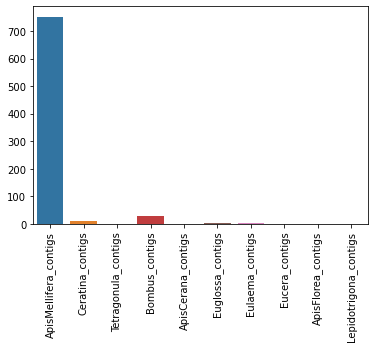

In [55]:
Apidae_len = [len(ApisMellifera_contigs) , len(Ceratina_contigs) , len(Tetragonula_contigs) , len(Bombus_contigs) , len(ApisCerana_contigs) , len(Euglossa_contigs) , len(Eulaema_contigs) , len(Eucera_contigs) , len(ApisFlorea_contigs) , len(Lepidotrigona_contigs)]

g = sns.barplot(x = ['ApisMellifera_contigs' , 'Ceratina_contigs' , 'Tetragonula_contigs' , 'Bombus_contigs' , 'ApisCerana_contigs' , 'Euglossa_contigs' , 'Eulaema_contigs' , 'Eucera_contigs' , 'ApisFlorea_contigs' , 'Lepidotrigona_contigs'], y=Apidae_len)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g

In [56]:
Apidae_sharing = []
Apidae_sharing.append(['Mellifera','Ceratina',len(Mellifera_Ceratina[Mellifera_Ceratina> len(Ceratina_cov)*0.1])])
Apidae_sharing.append(['Mellifera','Tetragonula',len(Mellifera_Tetragonula[Mellifera_Tetragonula> len(Tetragonula_cov)*0.1])])
Apidae_sharing.append(['Mellifera','Bombus',len(Mellifera_Bombus[Mellifera_Bombus> len(Bombus_cov)*0.1])])
Apidae_sharing.append(['Mellifera','ApisCerana',len(Mellifera_ApisCerana[Mellifera_ApisCerana> len(ApisCerana_cov)*0.1])])
Apidae_sharing.append(['Mellifera','Euglossa',len(Mellifera_Euglossa[Mellifera_Euglossa> len(Euglossa_cov)*0.1])])
Apidae_sharing.append(['Mellifera','Eulaema',len(Mellifera_Eulaema[Mellifera_Eulaema> len(Eulaema_cov)*0.1])])
Apidae_sharing.append(['Mellifera','Eucera',len(Mellifera_Eucera[Mellifera_Eucera> len(Eucera_cov)*0.1])])
Apidae_sharing.append(['Mellifera','ApisFlorea',len(Mellifera_ApisFlorea[Mellifera_ApisFlorea> len(ApisFlorea_cov)*0.1])])
Apidae_sharing.append(['Mellifera','Lepidotrigona',len(Mellifera_Lepidotrigona[Mellifera_Lepidotrigona> len(Lepidotrigona_cov)*0.1])])
Apidae_sharing.append(['Ceratina','Mellifera',len(Ceratina_Mellifera[Ceratina_Mellifera> len(ApisMellifera_cov)*0.1])])
Apidae_sharing.append(['Ceratina','Tetragonula',len(Ceratina_Tetragonula[Ceratina_Tetragonula> len(Tetragonula_cov)*0.1])])
Apidae_sharing.append(['Ceratina','Bombus',len(Ceratina_Bombus[Ceratina_Bombus> len(Bombus_cov)*0.1])])
Apidae_sharing.append(['Ceratina','ApisCerana',len(Ceratina_ApisCerana[Ceratina_ApisCerana> len(ApisCerana_cov)*0.1])])
Apidae_sharing.append(['Ceratina','Euglossa',len(Ceratina_Euglossa[Ceratina_Euglossa> len(Euglossa_cov)*0.1])])
Apidae_sharing.append(['Ceratina','Eulaema',len(Ceratina_Eulaema[Ceratina_Eulaema> len(Eulaema_cov)*0.1])])
Apidae_sharing.append(['Ceratina','Eucera',len(Ceratina_Eucera[Ceratina_Eucera> len(Eucera_cov)*0.1])])
Apidae_sharing.append(['Ceratina','ApisFlorea',len(Ceratina_ApisFlorea[Ceratina_ApisFlorea> len(ApisFlorea_cov)*0.1])])
Apidae_sharing.append(['Ceratina','Lepidotrigona',len(Ceratina_Lepidotrigona[Ceratina_Lepidotrigona> len(Lepidotrigona_cov)*0.1])])
Apidae_sharing.append(['Tetragonula','Mellifera',len(Tetragonula_Mellifera[Tetragonula_Mellifera> len(ApisMellifera_cov)*0.1])])
Apidae_sharing.append(['Tetragonula','Ceratina',len(Tetragonula_Ceratina[Tetragonula_Ceratina> len(Ceratina_cov)*0.1])])
Apidae_sharing.append(['Tetragonula','Bombus',len(Tetragonula_Bombus[Tetragonula_Bombus> len(Bombus_cov)*0.1])])
Apidae_sharing.append(['Tetragonula','ApisCerana',len(Tetragonula_ApisCerana[Tetragonula_ApisCerana> len(ApisCerana_cov)*0.1])])
Apidae_sharing.append(['Tetragonula','Euglossa',len(Tetragonula_Euglossa[Tetragonula_Euglossa> len(Euglossa_cov)*0.1])])
Apidae_sharing.append(['Tetragonula','Eulaema',len(Tetragonula_Eulaema[Tetragonula_Eulaema> len(Eulaema_cov)*0.1])])
Apidae_sharing.append(['Tetragonula','Eucera',len(Tetragonula_Eucera[Tetragonula_Eucera> len(Eucera_cov)*0.1])])
Apidae_sharing.append(['Tetragonula','ApisFlorea',len(Tetragonula_ApisFlorea[Tetragonula_ApisFlorea> len(ApisFlorea_cov)*0.1])])
Apidae_sharing.append(['Tetragonula','Lepidotrigona',len(Tetragonula_Lepidotrigona[Tetragonula_Lepidotrigona> len(Lepidotrigona_cov)*0.1])])
Apidae_sharing.append(['Bombus','Mellifera',len(Bombus_Mellifera[Bombus_Mellifera> len(ApisMellifera_cov)*0.1])])
Apidae_sharing.append(['Bombus','Ceratina',len(Bombus_Ceratina[Bombus_Ceratina> len(Ceratina_cov)*0.1])])
Apidae_sharing.append(['Bombus','Tetragonula',len(Bombus_Tetragonula[Bombus_Tetragonula> len(Tetragonula_cov)*0.1])])
Apidae_sharing.append(['Bombus','ApisCerana',len(Bombus_ApisCerana[Bombus_ApisCerana> len(ApisCerana_cov)*0.1])])
Apidae_sharing.append(['Bombus','Euglossa',len(Bombus_Euglossa[Bombus_Euglossa> len(Euglossa_cov)*0.1])])
Apidae_sharing.append(['Bombus','Eulaema',len(Bombus_Eulaema[Bombus_Eulaema> len(Eulaema_cov)*0.1])])
Apidae_sharing.append(['Bombus','Eucera',len(Bombus_Eucera[Bombus_Eucera> len(Eucera_cov)*0.1])])
Apidae_sharing.append(['Bombus','ApisFlorea',len(Bombus_ApisFlorea[Bombus_ApisFlorea> len(ApisFlorea_cov)*0.1])])
Apidae_sharing.append(['Bombus','Lepidotrigona',len(Bombus_Lepidotrigona[Bombus_Lepidotrigona> len(Lepidotrigona_cov)*0.1])])
Apidae_sharing.append(['ApisCerana','Mellifera',len(ApisCerana_Mellifera[ApisCerana_Mellifera> len(ApisMellifera_cov)*0.1])])
Apidae_sharing.append(['ApisCerana','Ceratina',len(ApisCerana_Ceratina[ApisCerana_Ceratina> len(Ceratina_cov)*0.1])])
Apidae_sharing.append(['ApisCerana','Tetragonula',len(ApisCerana_Tetragonula[ApisCerana_Tetragonula> len(Tetragonula_cov)*0.1])])
Apidae_sharing.append(['ApisCerana','Bombus',len(ApisCerana_Bombus[ApisCerana_Bombus> len(Bombus_cov)*0.1])])
Apidae_sharing.append(['ApisCerana','Euglossa',len(ApisCerana_Euglossa[ApisCerana_Euglossa> len(Euglossa_cov)*0.1])])
Apidae_sharing.append(['ApisCerana','Eulaema',len(ApisCerana_Eulaema[ApisCerana_Eulaema> len(Eulaema_cov)*0.1])])
Apidae_sharing.append(['ApisCerana','Eucera',len(ApisCerana_Eucera[ApisCerana_Eucera> len(Eucera_cov)*0.1])])
Apidae_sharing.append(['ApisCerana','ApisFlorea',len(ApisCerana_ApisFlorea[ApisCerana_ApisFlorea> len(ApisFlorea_cov)*0.1])])
Apidae_sharing.append(['ApisCerana','Lepidotrigona',len(ApisCerana_Lepidotrigona[ApisCerana_Lepidotrigona> len(Lepidotrigona_cov)*0.1])])
Apidae_sharing.append(['Euglossa','Mellifera',len(Euglossa_Mellifera[Euglossa_Mellifera> len(ApisMellifera_cov)*0.1])])
Apidae_sharing.append(['Euglossa','Ceratina',len(Euglossa_Ceratina[Euglossa_Ceratina> len(Ceratina_cov)*0.1])])
Apidae_sharing.append(['Euglossa','Tetragonula',len(Euglossa_Tetragonula[Euglossa_Tetragonula> len(Tetragonula_cov)*0.1])])
Apidae_sharing.append(['Euglossa','Bombus',len(Euglossa_Bombus[Euglossa_Bombus> len(Bombus_cov)*0.1])])
Apidae_sharing.append(['Euglossa','ApisCerana',len(Euglossa_ApisCerana[Euglossa_ApisCerana> len(ApisCerana_cov)*0.1])])
Apidae_sharing.append(['Euglossa','Eulaema',len(Euglossa_Eulaema[Euglossa_Eulaema> len(Eulaema_cov)*0.1])])
Apidae_sharing.append(['Euglossa','Eucera',len(Euglossa_Eucera[Euglossa_Eucera> len(Eucera_cov)*0.1])])
Apidae_sharing.append(['Euglossa','ApisFlorea',len(Euglossa_ApisFlorea[Euglossa_ApisFlorea> len(ApisFlorea_cov)*0.1])])
Apidae_sharing.append(['Euglossa','Lepidotrigona',len(Euglossa_Lepidotrigona[Euglossa_Lepidotrigona> len(Lepidotrigona_cov)*0.1])])
Apidae_sharing.append(['Eulaema','Mellifera',len(Eulaema_Mellifera[Eulaema_Mellifera> len(ApisMellifera_cov)*0.1])])
Apidae_sharing.append(['Eulaema','Ceratina',len(Eulaema_Ceratina[Eulaema_Ceratina> len(Ceratina_cov)*0.1])])
Apidae_sharing.append(['Eulaema','Tetragonula',len(Eulaema_Tetragonula[Eulaema_Tetragonula> len(Tetragonula_cov)*0.1])])
Apidae_sharing.append(['Eulaema','Bombus',len(Eulaema_Bombus[Eulaema_Bombus> len(Bombus_cov)*0.1])])
Apidae_sharing.append(['Eulaema','ApisCerana',len(Eulaema_ApisCerana[Eulaema_ApisCerana> len(ApisCerana_cov)*0.1])])
Apidae_sharing.append(['Eulaema','Euglossa',len(Eulaema_Euglossa[Eulaema_Euglossa> len(Euglossa_cov)*0.1])])
Apidae_sharing.append(['Eulaema','Eucera',len(Eulaema_Eucera[Eulaema_Eucera> len(Eucera_cov)*0.1])])
Apidae_sharing.append(['Eulaema','ApisFlorea',len(Eulaema_ApisFlorea[Eulaema_ApisFlorea> len(ApisFlorea_cov)*0.1])])
Apidae_sharing.append(['Eulaema','Lepidotrigona',len(Eulaema_Lepidotrigona[Eulaema_Lepidotrigona> len(Lepidotrigona_cov)*0.1])])
Apidae_sharing.append(['Eucera','Mellifera',len(Eucera_Mellifera[Eucera_Mellifera> len(ApisMellifera_cov)*0.1])])
Apidae_sharing.append(['Eucera','Ceratina',len(Eucera_Ceratina[Eucera_Ceratina> len(Ceratina_cov)*0.1])])
Apidae_sharing.append(['Eucera','Tetragonula',len(Eucera_Tetragonula[Eucera_Tetragonula> len(Tetragonula_cov)*0.1])])
Apidae_sharing.append(['Eucera','Bombus',len(Eucera_Bombus[Eucera_Bombus> len(Bombus_cov)*0.1])])
Apidae_sharing.append(['Eucera','ApisCerana',len(Eucera_ApisCerana[Eucera_ApisCerana> len(ApisCerana_cov)*0.1])])
Apidae_sharing.append(['Eucera','Euglossa',len(Eucera_Euglossa[Eucera_Euglossa> len(Euglossa_cov)*0.1])])
Apidae_sharing.append(['Eucera','Eulaema',len(Eucera_Eulaema[Eucera_Eulaema> len(Eulaema_cov)*0.1])])
Apidae_sharing.append(['Eucera','ApisFlorea',len(Eucera_ApisFlorea[Eucera_ApisFlorea> len(ApisFlorea_cov)*0.1])])
Apidae_sharing.append(['Eucera','Lepidotrigona',len(Eucera_Lepidotrigona[Eucera_Lepidotrigona> len(Lepidotrigona_cov)*0.1])])
Apidae_sharing.append(['ApisFlorea','Mellifera',len(ApisFlorea_Mellifera[ApisFlorea_Mellifera> len(ApisMellifera_cov)*0.1])])
Apidae_sharing.append(['ApisFlorea','Ceratina',len(ApisFlorea_Ceratina[ApisFlorea_Ceratina> len(Ceratina_cov)*0.1])])
Apidae_sharing.append(['ApisFlorea','Tetragonula',len(ApisFlorea_Tetragonula[ApisFlorea_Tetragonula> len(Tetragonula_cov)*0.1])])
Apidae_sharing.append(['ApisFlorea','Bombus',len(ApisFlorea_Bombus[ApisFlorea_Bombus> len(Bombus_cov)*0.1])])
Apidae_sharing.append(['ApisFlorea','ApisCerana',len(ApisFlorea_ApisCerana[ApisFlorea_ApisCerana> len(ApisCerana_cov)*0.1])])
Apidae_sharing.append(['ApisFlorea','Euglossa',len(ApisFlorea_Euglossa[ApisFlorea_Euglossa> len(Euglossa_cov)*0.1])])
Apidae_sharing.append(['ApisFlorea','Eulaema',len(ApisFlorea_Eulaema[ApisFlorea_Eulaema> len(Eulaema_cov)*0.1])])
Apidae_sharing.append(['ApisFlorea','Eucera',len(ApisFlorea_Eucera[ApisFlorea_Eucera> len(Eucera_cov)*0.1])])
Apidae_sharing.append(['ApisFlorea','Lepidotrigona',len(ApisFlorea_Lepidotrigona[ApisFlorea_Lepidotrigona> len(Lepidotrigona_cov)*0.1])])
Apidae_sharing.append(['Lepidotrigona','Mellifera',len(Lepidotrigona_Mellifera[Lepidotrigona_Mellifera> len(ApisMellifera_cov)*0.1])])
Apidae_sharing.append(['Lepidotrigona','Ceratina',len(Lepidotrigona_Ceratina[Lepidotrigona_Ceratina> len(Ceratina_cov)*0.1])])
Apidae_sharing.append(['Lepidotrigona','Tetragonula',len(Lepidotrigona_Tetragonula[Lepidotrigona_Tetragonula> len(Tetragonula_cov)*0.1])])
Apidae_sharing.append(['Lepidotrigona','Bombus',len(Lepidotrigona_Bombus[Lepidotrigona_Bombus> len(Bombus_cov)*0.1])])
Apidae_sharing.append(['Lepidotrigona','ApisCerana',len(Lepidotrigona_ApisCerana[Lepidotrigona_ApisCerana> len(ApisCerana_cov)*0.1])])
Apidae_sharing.append(['Lepidotrigona','Euglossa',len(Lepidotrigona_Euglossa[Lepidotrigona_Euglossa> len(Euglossa_cov)*0.1])])
Apidae_sharing.append(['Lepidotrigona','Eulaema',len(Lepidotrigona_Eulaema[Lepidotrigona_Eulaema> len(Eulaema_cov)*0.1])])
Apidae_sharing.append(['Lepidotrigona','Eucera',len(Lepidotrigona_Eucera[Lepidotrigona_Eucera> len(Eucera_cov)*0.1])])
Apidae_sharing.append(['Lepidotrigona','ApisFlorea',len(Lepidotrigona_ApisFlorea[Lepidotrigona_ApisFlorea> len(ApisFlorea_cov)*0.1])])

In [57]:
#Remove the 0's, normalize for total shared contigs.
Apidae_sharing2 = []
for i in Apidae_sharing:
    if i[2] > 0:
        templis = i
        templis[2] = templis[2]/sum(famlen)
        Apidae_sharing2.append(templis)

In [58]:
#Write to file, and process in cytoscape
with open('../networks/Apidaesharing_netw0.1_subset_plants.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(Apidae_sharing2)

In [59]:
#Now look at the taxonomical information.
contigdic_api = {}
contigdic_api['Mellifera_Ceratina'] = list(Mellifera_Ceratina[Mellifera_Ceratina> len(Ceratina_cov)*0.1].index)
contigdic_api['Mellifera_Tetragonula'] = list(Mellifera_Tetragonula[Mellifera_Tetragonula> len(Tetragonula_cov)*0.1].index)
contigdic_api['Mellifera_Bombus'] = list(Mellifera_Bombus[Mellifera_Bombus> len(Bombus_cov)*0.1].index)
contigdic_api['Mellifera_ApisCerana'] = list(Mellifera_ApisCerana[Mellifera_ApisCerana> len(ApisCerana_cov)*0.1].index)
contigdic_api['Mellifera_Euglossa'] = list(Mellifera_Euglossa[Mellifera_Euglossa> len(Euglossa_cov)*0.1].index)
contigdic_api['Mellifera_Eulaema'] = list(Mellifera_Eulaema[Mellifera_Eulaema> len(Eulaema_cov)*0.1].index)
contigdic_api['Mellifera_Eucera'] = list(Mellifera_Eucera[Mellifera_Eucera> len(Eucera_cov)*0.1].index)
contigdic_api['Mellifera_ApisFlorea'] = list(Mellifera_ApisFlorea[Mellifera_ApisFlorea> len(ApisFlorea_cov)*0.1].index)
contigdic_api['Mellifera_Lepidotrigona'] = list(Mellifera_Lepidotrigona[Mellifera_Lepidotrigona> len(Lepidotrigona_cov)*0.1].index)
contigdic_api['Ceratina_Mellifera'] = list(Ceratina_Mellifera[Ceratina_Mellifera> len(ApisMellifera_cov)*0.1].index)
contigdic_api['Ceratina_Tetragonula'] = list(Ceratina_Tetragonula[Ceratina_Tetragonula> len(Tetragonula_cov)*0.1].index)
contigdic_api['Ceratina_Bombus'] = list(Ceratina_Bombus[Ceratina_Bombus> len(Bombus_cov)*0.1].index)
contigdic_api['Ceratina_ApisCerana'] = list(Ceratina_ApisCerana[Ceratina_ApisCerana> len(ApisCerana_cov)*0.1].index)
contigdic_api['Ceratina_Euglossa'] = list(Ceratina_Euglossa[Ceratina_Euglossa> len(Euglossa_cov)*0.1].index)
contigdic_api['Ceratina_Eulaema'] = list(Ceratina_Eulaema[Ceratina_Eulaema> len(Eulaema_cov)*0.1].index)
contigdic_api['Ceratina_Eucera'] = list(Ceratina_Eucera[Ceratina_Eucera> len(Eucera_cov)*0.1].index)
contigdic_api['Ceratina_ApisFlorea'] = list(Ceratina_ApisFlorea[Ceratina_ApisFlorea> len(ApisFlorea_cov)*0.1].index)
contigdic_api['Ceratina_Lepidotrigona'] = list(Ceratina_Lepidotrigona[Ceratina_Lepidotrigona> len(Lepidotrigona_cov)*0.1].index)
contigdic_api['Tetragonula_Mellifera'] = list(Tetragonula_Mellifera[Tetragonula_Mellifera> len(ApisMellifera_cov)*0.1].index)
contigdic_api['Tetragonula_Ceratina'] = list(Tetragonula_Ceratina[Tetragonula_Ceratina> len(Ceratina_cov)*0.1].index)
contigdic_api['Tetragonula_Bombus'] = list(Tetragonula_Bombus[Tetragonula_Bombus> len(Bombus_cov)*0.1].index)
contigdic_api['Tetragonula_ApisCerana'] = list(Tetragonula_ApisCerana[Tetragonula_ApisCerana> len(ApisCerana_cov)*0.1].index)
contigdic_api['Tetragonula_Euglossa'] = list(Tetragonula_Euglossa[Tetragonula_Euglossa> len(Euglossa_cov)*0.1].index)
contigdic_api['Tetragonula_Eulaema'] = list(Tetragonula_Eulaema[Tetragonula_Eulaema> len(Eulaema_cov)*0.1].index)
contigdic_api['Tetragonula_Eucera'] = list(Tetragonula_Eucera[Tetragonula_Eucera> len(Eucera_cov)*0.1].index)
contigdic_api['Tetragonula_ApisFlorea'] = list(Tetragonula_ApisFlorea[Tetragonula_ApisFlorea> len(ApisFlorea_cov)*0.1].index)
contigdic_api['Tetragonula_Lepidotrigona'] = list(Tetragonula_Lepidotrigona[Tetragonula_Lepidotrigona> len(Lepidotrigona_cov)*0.1].index)
contigdic_api['Bombus_Mellifera'] = list(Bombus_Mellifera[Bombus_Mellifera> len(ApisMellifera_cov)*0.1].index)
contigdic_api['Bombus_Ceratina'] = list(Bombus_Ceratina[Bombus_Ceratina> len(Ceratina_cov)*0.1].index)
contigdic_api['Bombus_Tetragonula'] = list(Bombus_Tetragonula[Bombus_Tetragonula> len(Tetragonula_cov)*0.1].index)
contigdic_api['Bombus_ApisCerana'] = list(Bombus_ApisCerana[Bombus_ApisCerana> len(ApisCerana_cov)*0.1].index)
contigdic_api['Bombus_Euglossa'] = list(Bombus_Euglossa[Bombus_Euglossa> len(Euglossa_cov)*0.1].index)
contigdic_api['Bombus_Eulaema'] = list(Bombus_Eulaema[Bombus_Eulaema> len(Eulaema_cov)*0.1].index)
contigdic_api['Bombus_Eucera'] = list(Bombus_Eucera[Bombus_Eucera> len(Eucera_cov)*0.1].index)
contigdic_api['Bombus_ApisFlorea'] = list(Bombus_ApisFlorea[Bombus_ApisFlorea> len(ApisFlorea_cov)*0.1].index)
contigdic_api['Bombus_Lepidotrigona'] = list(Bombus_Lepidotrigona[Bombus_Lepidotrigona> len(Lepidotrigona_cov)*0.1].index)
contigdic_api['ApisCerana_Mellifera'] = list(ApisCerana_Mellifera[ApisCerana_Mellifera> len(ApisMellifera_cov)*0.1].index)
contigdic_api['ApisCerana_Ceratina'] = list(ApisCerana_Ceratina[ApisCerana_Ceratina> len(Ceratina_cov)*0.1].index)
contigdic_api['ApisCerana_Tetragonula'] = list(ApisCerana_Tetragonula[ApisCerana_Tetragonula> len(Tetragonula_cov)*0.1].index)
contigdic_api['ApisCerana_Bombus'] = list(ApisCerana_Bombus[ApisCerana_Bombus> len(Bombus_cov)*0.1].index)
contigdic_api['ApisCerana_Euglossa'] = list(ApisCerana_Euglossa[ApisCerana_Euglossa> len(Euglossa_cov)*0.1].index)
contigdic_api['ApisCerana_Eulaema'] = list(ApisCerana_Eulaema[ApisCerana_Eulaema> len(Eulaema_cov)*0.1].index)
contigdic_api['ApisCerana_Eucera'] = list(ApisCerana_Eucera[ApisCerana_Eucera> len(Eucera_cov)*0.1].index)
contigdic_api['ApisCerana_ApisFlorea'] = list(ApisCerana_ApisFlorea[ApisCerana_ApisFlorea> len(ApisFlorea_cov)*0.1].index)
contigdic_api['ApisCerana_Lepidotrigona'] = list(ApisCerana_Lepidotrigona[ApisCerana_Lepidotrigona> len(Lepidotrigona_cov)*0.1].index)
contigdic_api['Euglossa_Mellifera'] = list(Euglossa_Mellifera[Euglossa_Mellifera> len(ApisMellifera_cov)*0.1].index)
contigdic_api['Euglossa_Ceratina'] = list(Euglossa_Ceratina[Euglossa_Ceratina> len(Ceratina_cov)*0.1].index)
contigdic_api['Euglossa_Tetragonula'] = list(Euglossa_Tetragonula[Euglossa_Tetragonula> len(Tetragonula_cov)*0.1].index)
contigdic_api['Euglossa_Bombus'] = list(Euglossa_Bombus[Euglossa_Bombus> len(Bombus_cov)*0.1].index)
contigdic_api['Euglossa_ApisCerana'] = list(Euglossa_ApisCerana[Euglossa_ApisCerana> len(ApisCerana_cov)*0.1].index)
contigdic_api['Euglossa_Eulaema'] = list(Euglossa_Eulaema[Euglossa_Eulaema> len(Eulaema_cov)*0.1].index)
contigdic_api['Euglossa_Eucera'] = list(Euglossa_Eucera[Euglossa_Eucera> len(Eucera_cov)*0.1].index)
contigdic_api['Euglossa_ApisFlorea'] = list(Euglossa_ApisFlorea[Euglossa_ApisFlorea> len(ApisFlorea_cov)*0.1].index)
contigdic_api['Euglossa_Lepidotrigona'] = list(Euglossa_Lepidotrigona[Euglossa_Lepidotrigona> len(Lepidotrigona_cov)*0.1].index)
contigdic_api['Eulaema_Mellifera'] = list(Eulaema_Mellifera[Eulaema_Mellifera> len(ApisMellifera_cov)*0.1].index)
contigdic_api['Eulaema_Ceratina'] = list(Eulaema_Ceratina[Eulaema_Ceratina> len(Ceratina_cov)*0.1].index)
contigdic_api['Eulaema_Tetragonula'] = list(Eulaema_Tetragonula[Eulaema_Tetragonula> len(Tetragonula_cov)*0.1].index)
contigdic_api['Eulaema_Bombus'] = list(Eulaema_Bombus[Eulaema_Bombus> len(Bombus_cov)*0.1].index)
contigdic_api['Eulaema_ApisCerana'] = list(Eulaema_ApisCerana[Eulaema_ApisCerana> len(ApisCerana_cov)*0.1].index)
contigdic_api['Eulaema_Euglossa'] = list(Eulaema_Euglossa[Eulaema_Euglossa> len(Euglossa_cov)*0.1].index)
contigdic_api['Eulaema_Eucera'] = list(Eulaema_Eucera[Eulaema_Eucera> len(Eucera_cov)*0.1].index)
contigdic_api['Eulaema_ApisFlorea'] = list(Eulaema_ApisFlorea[Eulaema_ApisFlorea> len(ApisFlorea_cov)*0.1].index)
contigdic_api['Eulaema_Lepidotrigona'] = list(Eulaema_Lepidotrigona[Eulaema_Lepidotrigona> len(Lepidotrigona_cov)*0.1].index)
contigdic_api['Eucera_Mellifera'] = list(Eucera_Mellifera[Eucera_Mellifera> len(ApisMellifera_cov)*0.1].index)
contigdic_api['Eucera_Ceratina'] = list(Eucera_Ceratina[Eucera_Ceratina> len(Ceratina_cov)*0.1].index)
contigdic_api['Eucera_Tetragonula'] = list(Eucera_Tetragonula[Eucera_Tetragonula> len(Tetragonula_cov)*0.1].index)
contigdic_api['Eucera_Bombus'] = list(Eucera_Bombus[Eucera_Bombus> len(Bombus_cov)*0.1].index)
contigdic_api['Eucera_ApisCerana'] = list(Eucera_ApisCerana[Eucera_ApisCerana> len(ApisCerana_cov)*0.1].index)
contigdic_api['Eucera_Euglossa'] = list(Eucera_Euglossa[Eucera_Euglossa> len(Euglossa_cov)*0.1].index)
contigdic_api['Eucera_Eulaema'] = list(Eucera_Eulaema[Eucera_Eulaema> len(Eulaema_cov)*0.1].index)
contigdic_api['Eucera_ApisFlorea'] = list(Eucera_ApisFlorea[Eucera_ApisFlorea> len(ApisFlorea_cov)*0.1].index)
contigdic_api['Eucera_Lepidotrigona'] = list(Eucera_Lepidotrigona[Eucera_Lepidotrigona> len(Lepidotrigona_cov)*0.1].index)
contigdic_api['ApisFlorea_Mellifera'] = list(ApisFlorea_Mellifera[ApisFlorea_Mellifera> len(ApisMellifera_cov)*0.1].index)
contigdic_api['ApisFlorea_Ceratina'] = list(ApisFlorea_Ceratina[ApisFlorea_Ceratina> len(Ceratina_cov)*0.1].index)
contigdic_api['ApisFlorea_Tetragonula'] = list(ApisFlorea_Tetragonula[ApisFlorea_Tetragonula> len(Tetragonula_cov)*0.1].index)
contigdic_api['ApisFlorea_Bombus'] = list(ApisFlorea_Bombus[ApisFlorea_Bombus> len(Bombus_cov)*0.1].index)
contigdic_api['ApisFlorea_ApisCerana'] = list(ApisFlorea_ApisCerana[ApisFlorea_ApisCerana> len(ApisCerana_cov)*0.1].index)
contigdic_api['ApisFlorea_Euglossa'] = list(ApisFlorea_Euglossa[ApisFlorea_Euglossa> len(Euglossa_cov)*0.1].index)
contigdic_api['ApisFlorea_Eulaema'] = list(ApisFlorea_Eulaema[ApisFlorea_Eulaema> len(Eulaema_cov)*0.1].index)
contigdic_api['ApisFlorea_Eucera'] = list(ApisFlorea_Eucera[ApisFlorea_Eucera> len(Eucera_cov)*0.1].index)
contigdic_api['ApisFlorea_Lepidotrigona'] = list(ApisFlorea_Lepidotrigona[ApisFlorea_Lepidotrigona> len(Lepidotrigona_cov)*0.1].index)
contigdic_api['Lepidotrigona_Mellifera'] = list(Lepidotrigona_Mellifera[Lepidotrigona_Mellifera> len(ApisMellifera_cov)*0.1].index)
contigdic_api['Lepidotrigona_Ceratina'] = list(Lepidotrigona_Ceratina[Lepidotrigona_Ceratina> len(Ceratina_cov)*0.1].index)
contigdic_api['Lepidotrigona_Tetragonula'] = list(Lepidotrigona_Tetragonula[Lepidotrigona_Tetragonula> len(Tetragonula_cov)*0.1].index)
contigdic_api['Lepidotrigona_Bombus'] = list(Lepidotrigona_Bombus[Lepidotrigona_Bombus> len(Bombus_cov)*0.1].index)
contigdic_api['Lepidotrigona_ApisCerana'] = list(Lepidotrigona_ApisCerana[Lepidotrigona_ApisCerana> len(ApisCerana_cov)*0.1].index)
contigdic_api['Lepidotrigona_Euglossa'] = list(Lepidotrigona_Euglossa[Lepidotrigona_Euglossa> len(Euglossa_cov)*0.1].index)
contigdic_api['Lepidotrigona_Eulaema'] = list(Lepidotrigona_Eulaema[Lepidotrigona_Eulaema> len(Eulaema_cov)*0.1].index)
contigdic_api['Lepidotrigona_Eucera'] = list(Lepidotrigona_Eucera[Lepidotrigona_Eucera> len(Eucera_cov)*0.1].index)
contigdic_api['Lepidotrigona_ApisFlorea'] = list(Lepidotrigona_ApisFlorea[Lepidotrigona_ApisFlorea> len(ApisFlorea_cov)*0.1].index)

In [60]:
#What's the total number of contigs we found sharing?
shared_contigs = []
for i in contigdic:
    for j in contigdic[i]:
        if j not in shared_contigs:
            shared_contigs.append(j)
for i in contigdic_api:
    for j in contigdic_api[i]:
        if j not in shared_contigs:
            shared_contigs.append(j)
print(len(shared_contigs)/sum(famlen))
print(len(shared_contigs))
print(sum(famlen))

0.6131147540983607
561
915


In [61]:
#Parse over the contigdic.
contigdictax_api = {}
for i in contigdic_api:
    tempdic = {}
    for j in list(taxdf[taxdf.index.isin(contigdic_api[i])]['family']):
        if j in tempdic:
            tempdic[j] += 1
        else:
            tempdic[j] = 1
    contigdictax_api[i] = tempdic

In [62]:
contigdic_api_tax_neslis = []
for i in contigdictax_api:
    for j in contigdictax_api[i]:
        contigdic_api_tax_neslis.append([str(i.split('_')[0]), str(i.split('_')[1]), str(j), str(contigdictax_api[i][j])])

In [63]:
#Write to file, and process in cytoscape
with open('../networks/Virussharing_netw0.1_TAX_apidae_subset_plants.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(contigdic_api_tax_neslis)